In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from matplotlib import ticker
from python_files.maxent import MaxEnt
import python_files.densities as d

In [16]:
#Set sizes 
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Estimate of absolute integration error of norm. const.: 6.040e-14
The resulting parameters:
  Lambda_1 = -1.010


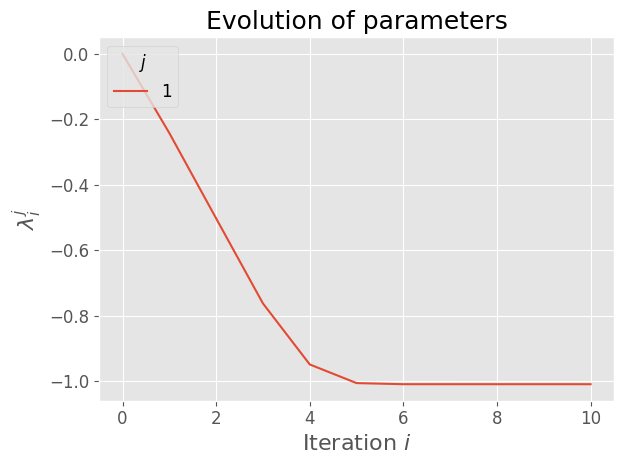

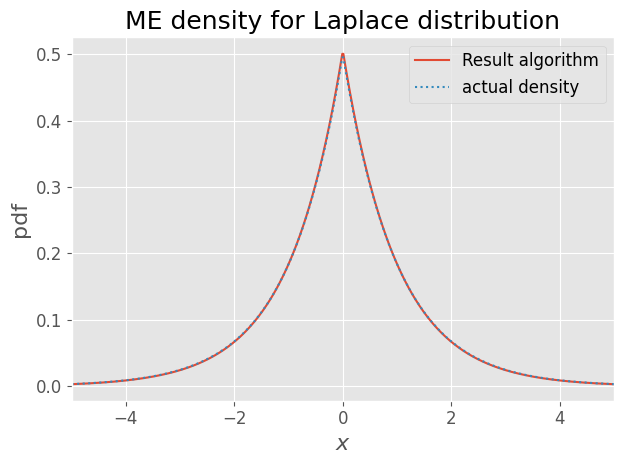

Absolute error: 1.00e-02 


In [17]:
c  = 1                              #>0
mu = 0
l,u = -7,7                        #bounds for calculating
n = 50                              #amount of points of Gaussian quadrature


ob_pareto = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=d.b_constraint_laplace(mu,c),
                   f_vector=d.f_constraint_laplace, 
                   f_param=[mu, c],
                   message_norm=True,
                   warning_convergence=True)
ob_pareto.visualize_algorithm(title_save="figs/viz_alg_example_laplace_good.pdf")
ob_pareto.visualize_solution(xlim=[-5,5],
                             actual_density=d.pdf_laplace,
                             actual_param=[mu,c], 
                             title="ME density for Laplace distribution",
                             title_save="figs/viz_sol_example_laplace_good.pdf")
error = ob_pareto.calc_error(d.lambda_actual_laplace(mu,c))
print(f"Absolute error: {error:.2e} ")

Estimate of absolute integration error of norm. const.: 7.114e-12
The resulting parameters:
  Lambda_1 = -1.171


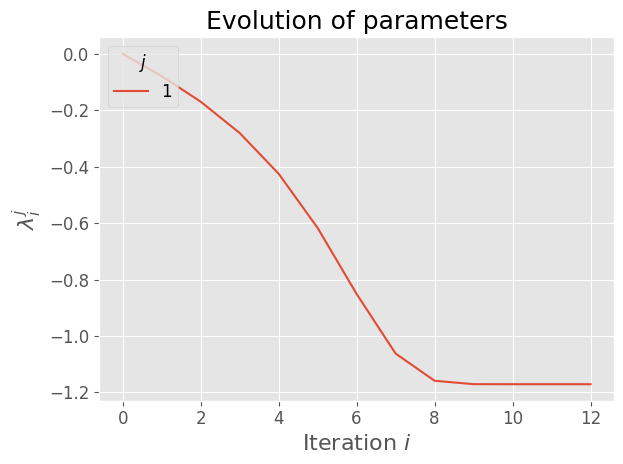

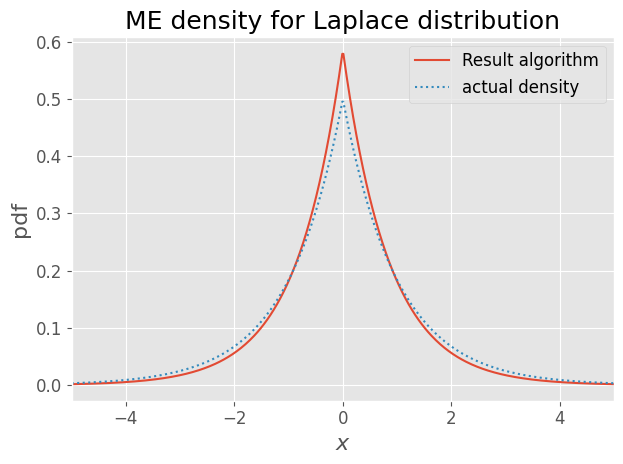

Absolute error: 1.71e-01 


In [18]:
c  = 1                              #>0
mu = 0
l,u = -20, 20                        #bounds for calculating
n = 50                              #amount of points of Gaussian quadrature


ob_pareto = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=d.b_constraint_laplace(mu,c),
                   f_vector=d.f_constraint_laplace, 
                   f_param=[mu, c],
                   message_norm=True,
                   warning_convergence=True)
ob_pareto.visualize_algorithm(title_save="figs/viz_alg_example_laplace_bad.pdf")
ob_pareto.visualize_solution(xlim=[-5,5],
                             actual_density=d.pdf_laplace,
                             actual_param=[mu,c], 
                             title="ME density for Laplace distribution",
                             title_save="figs/viz_sol_example_laplace_bad.pdf")
error = ob_pareto.calc_error(d.lambda_actual_laplace(mu,c))
print(f"Absolute error: {error:.2e} ")

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
Estimate of absolute integration error of norm. const.: 5.336e+147
The resulting parameters:
  Lambda_1 = -368.022


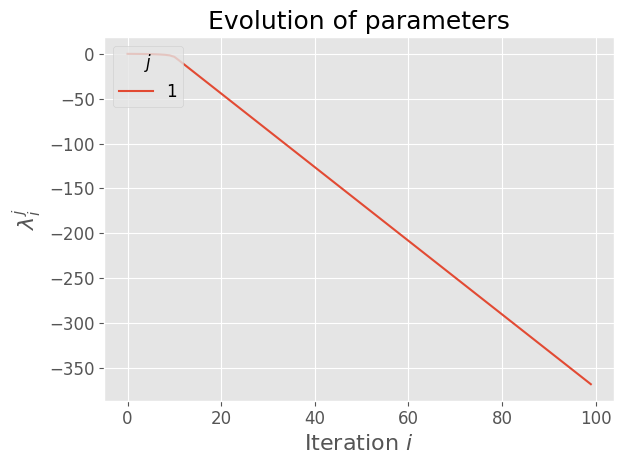

In [19]:
c  = 1                              #>0
mu = 0
l,u = -40, 40                        #bounds for calculating
n = 50                              #amount of points of Gaussian quadrature


ob_pareto = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=d.b_constraint_laplace(mu,c),
                   f_vector=d.f_constraint_laplace, 
                   f_param=[mu, c],
                   message_norm=True,
                   warning_convergence=True)
ob_pareto.visualize_algorithm(title_save="figs/viz_alg_example_laplace_non_converging.pdf")